In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans
from tabulate import tabulate

In [2]:
Nor1Up1NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/NoCC/Updraft1/interp_nn_timeseries.nc')
Nor2Up1NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/NoCC/Updraft1/interp_nn_timeseries.nc')
Nor3Up1NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/NoCC/Updraft1/interp_nn_timeseries.nc')
Nor4Up1NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/NoCC/Updraft1/interp_nn_timeseries.nc')
Nor1Up2NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/NoCC/Updraft2/interp_nn_timeseries.nc')
Nor2Up2NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/NoCC/Updraft2/interp_nn_timeseries.nc')
Nor3Up2NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/NoCC/Updraft2/interp_nn_timeseries.nc')
Nor4Up2NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/NoCC/Updraft2/interp_nn_timeseries.nc')
Nor1Up3NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/NoCC/Updraft3/interp_nn_timeseries.nc')
Nor2Up3NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/NoCC/Updraft3/interp_nn_timeseries.nc')
Nor3Up3NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/NoCC/Updraft3/interp_nn_timeseries.nc')
Nor4Up3NoCC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/NoCC/Updraft3/interp_nn_timeseries.nc')

In [3]:
Nor1Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft1/interp_nn_timeseries.nc')
Nor2Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft1/interp_nn_timeseries.nc')
Nor3Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft1/interp_nn_timeseries.nc')
Nor4Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft1/interp_nn_timeseries.nc')
Nor1Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft2/interp_nn_timeseries.nc')
Nor2Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft2/interp_nn_timeseries.nc')
Nor3Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft2/interp_nn_timeseries.nc')
Nor4Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft2/interp_nn_timeseries.nc')
Nor1Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft3/interp_nn_timeseries.nc')
Nor2Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft3/interp_nn_timeseries.nc')
Nor3Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft3/interp_nn_timeseries.nc')
Nor4Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft3/interp_nn_timeseries.nc')


In [4]:
Name_ls = [Nor1Up1NoCC_ds, Nor2Up1NoCC_ds,Nor3Up1NoCC_ds,Nor4Up1NoCC_ds,Nor1Up2NoCC_ds, Nor2Up2NoCC_ds,Nor3Up2NoCC_ds,Nor4Up2NoCC_ds,\
           Nor1Up3NoCC_ds,Nor2Up3NoCC_ds,Nor3Up3NoCC_ds,Nor4Up3NoCC_ds,\
Nor1Up1CC_ds, Nor2Up1CC_ds,Nor3Up1CC_ds, Nor4Up1CC_ds,Nor1Up2CC_ds, Nor2Up2CC_ds,Nor3Up2CC_ds,Nor4Up2CC_ds,\
           Nor1Up3CC_ds,Nor2Up3CC_ds,Nor3Up3CC_ds,Nor4Up3CC_ds]

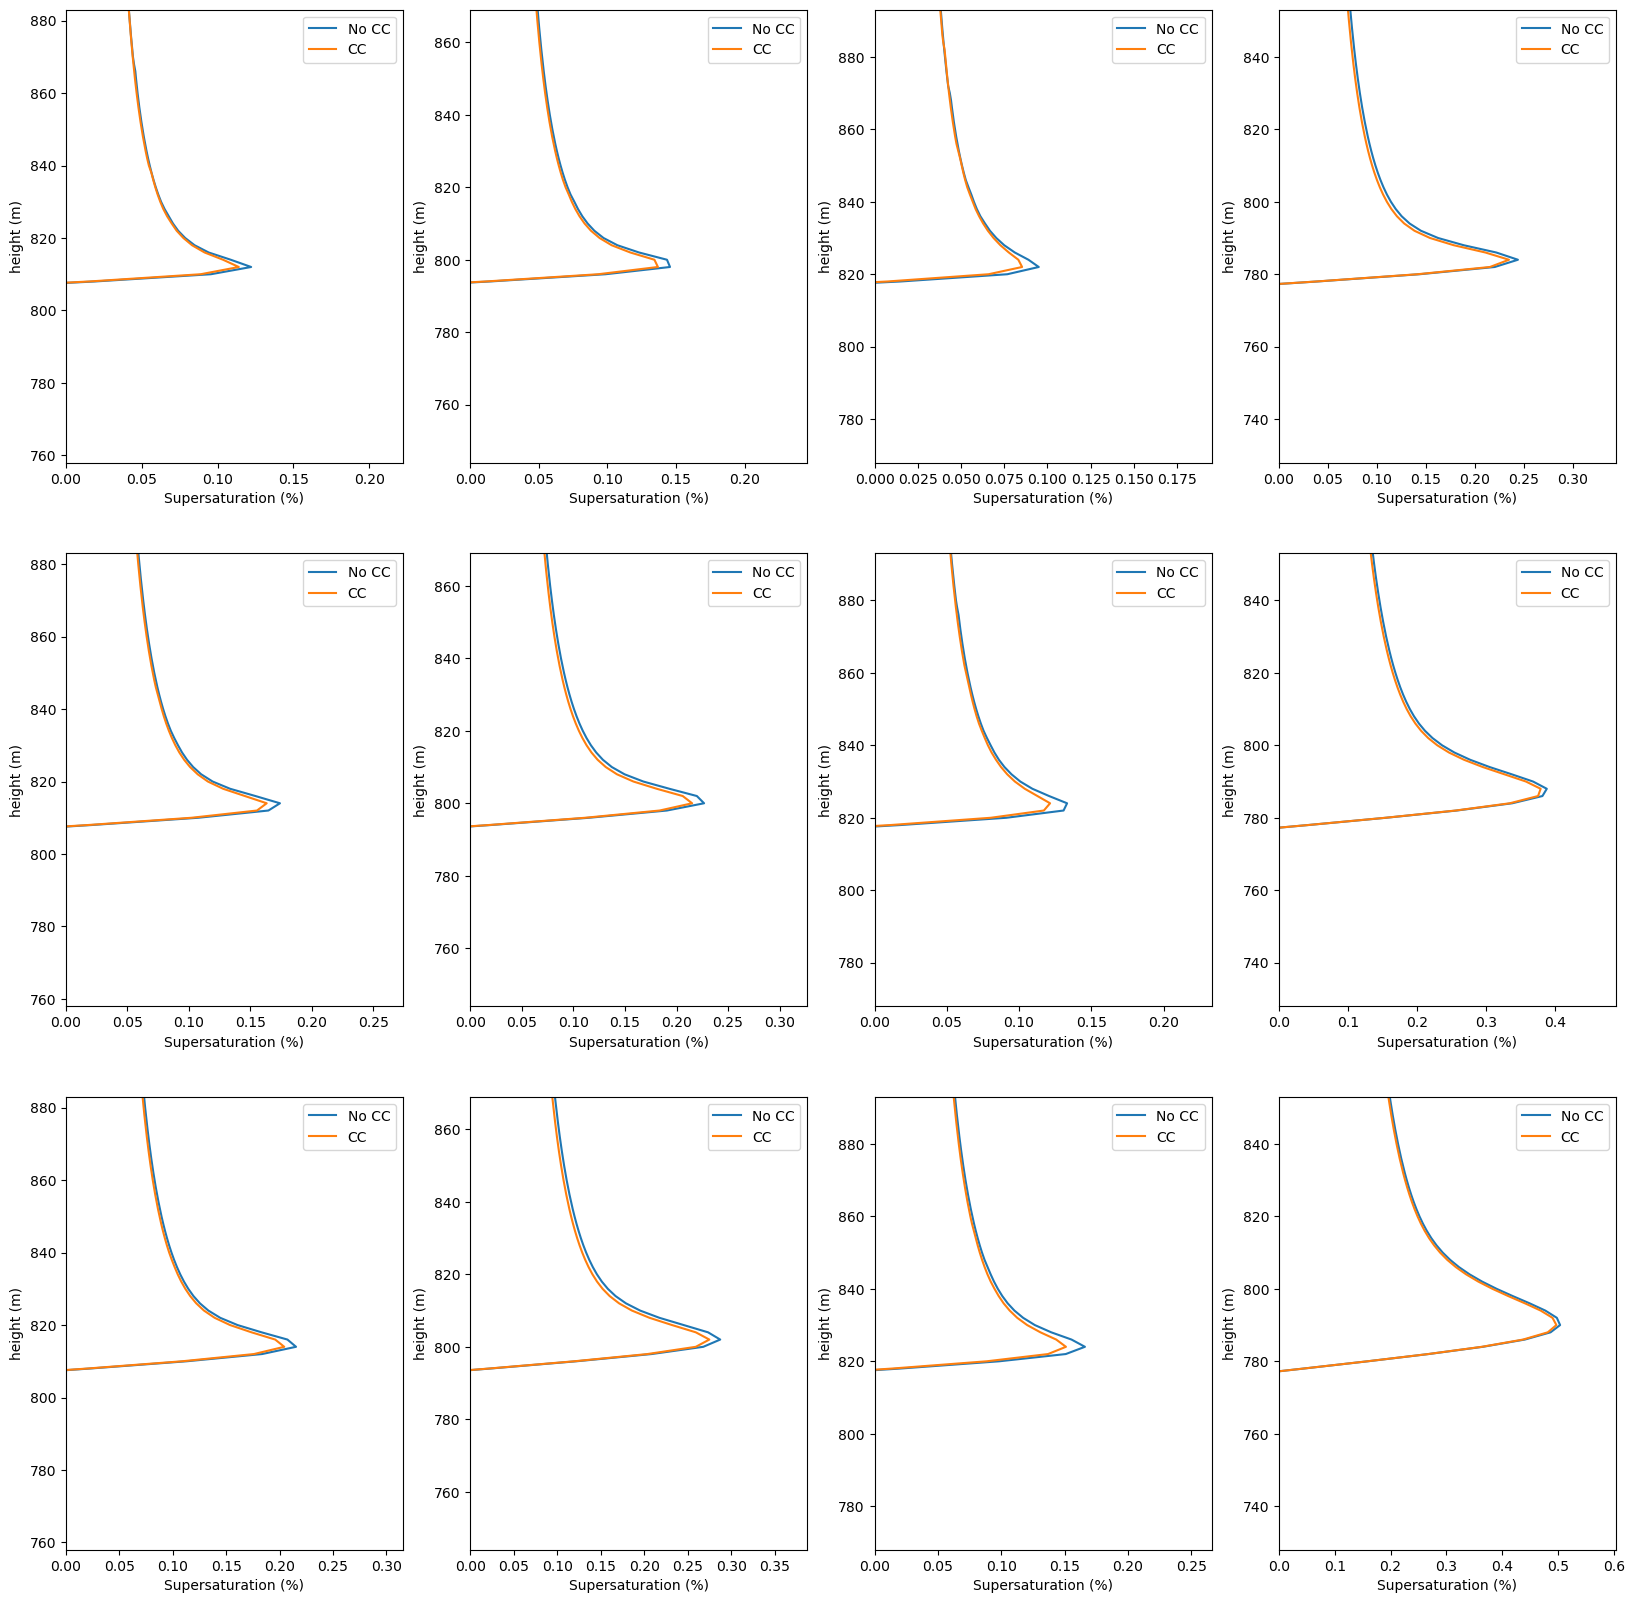

In [5]:
fig = plt.figure(figsize = (20,20))
for i in range (0,12):
    plt.subplot(3,4,i+1)
    plt.plot(Name_ls[i]['susa'],Name_ls[i]['height'], label = 'No CC')
    plt.plot(Name_ls[i+12]['susa'],Name_ls[i+12]['height'], label = 'CC')
    plt.xlim([0,Name_ls[i]['susa'].max()+.1])
    CBheight = np.min(Name_ls[i]['height'].where(Name_ls[i]['susa']>=0))
    plt.ylim([CBheight-50, CBheight+75])
    plt.ylabel('height (m)')
    plt.xlabel('Supersaturation (%)')
    plt.legend()

In [6]:
Nor1Up1CC_ds['fa_act'].isel(time_entries =-1, num_activation_criteria = 2,num_aerosols_plus_3 = 0).values

array(408.87735613)

In [7]:
Nor1Up1CC_ds['fa_act']

<xarray.DataArray 'fa_act' (time_entries: 198, num_activation_criteria: 4,
                            num_aerosols_plus_3: 7)> Size: 44kB
[5544 values with dtype=float64]
Dimensions without coordinates: time_entries, num_activation_criteria,
                                num_aerosols_plus_3
Attributes:
    units:        # cm-3
    description:  Activated cloud drop concentration. Entries 1-4: for each a...

In [8]:
Delta_SMax = []
NoCC_SMax = []
CC_SMax = []
for i in range (0, int(len(Name_ls)/2)):
    Delta_SMax.append(Name_ls[i]['susa'].max().values-Name_ls[i+int(len(Name_ls)/2)]['susa'].max().values)
    NoCC_SMax.append(Name_ls[i]['susa'].max().values)
    CC_SMax.append(Name_ls[i+int(len(Name_ls)/2)]['susa'].max().values)
Data = {'NoCC Smax': NoCC_SMax, 'CC Smax': CC_SMax, 'Delta SMax': Delta_SMax}
Smax_df = pd.DataFrame(Data)
Smax_df.index = ['Cluster 1 Updraft 1','Cluster 2 Updraft 1','Cluster 3 Updraft 1','Cluster 4 Updraft 1', 'Cluster 1 Updraft 2','Cluster 2 Updraft 2','Cluster 3 Updraft 2','Cluster 4 Updraft 2','Cluster 1 Updraft 3','Cluster 2 Updraft 3','Cluster 3 Updraft 3','Cluster 4 Updraft 3']
Smax_df

,NoCC Smax,CC Smax,Delta SMax
Cluster 1 Updraft 1,0.12211708513361148,0.11398460817951686,0.008132
Cluster 2 Updraft 1,0.14561508951312396,0.13679065939294005,0.008824
Cluster 3 Updraft 1,0.09501171964154091,0.08536584245617565,0.009646
Cluster 4 Updraft 1,0.2439143055902408,0.23477270161983993,0.009142
Cluster 1 Updraft 2,0.17418053219224222,0.1633703575406049,0.010810
Cluster 2 Updraft 2,0.2267228438438608,0.21512622709986456,0.011597
Cluster 3 Updraft 2,0.13323221452480719,0.121458714483225,0.011774
Cluster 4 Updraft 2,0.3875887773614295,0.37869047849822235,0.008898
Cluster 1 Updraft 3,0.21544638348284445,0.2044180762313955,0.011028
Cluster 2 Updraft 3,0.2873364605874238,0.2748263995113039,0.012510


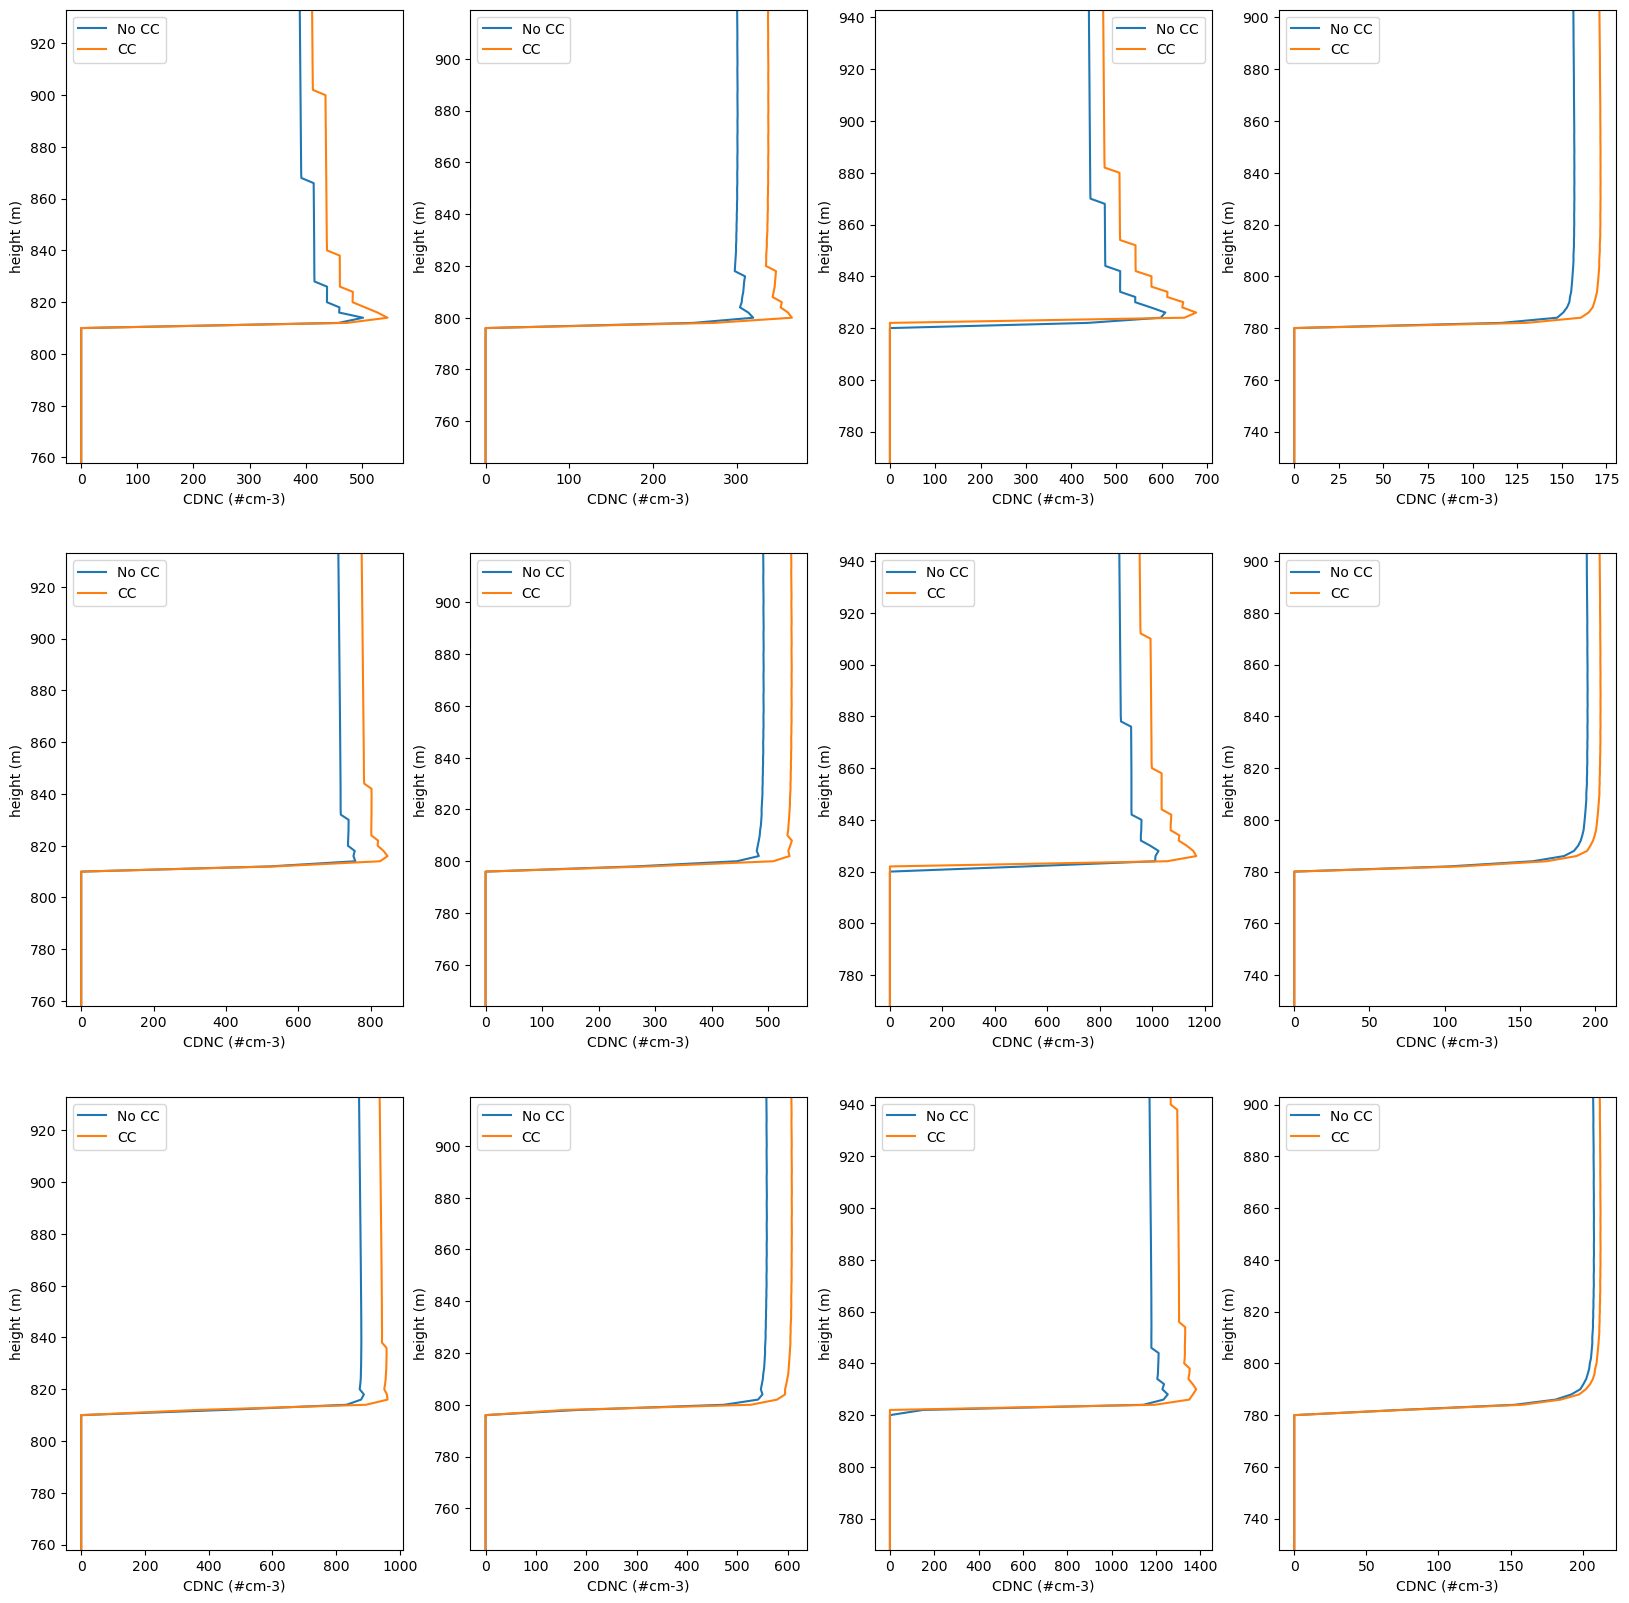

In [9]:
fig = plt.figure(figsize = (20,20))
for i in range (0,12):
    plt.subplot(3,4,i+1)
    CDNCNOCC = Name_ls[i]['fa_act'].isel( num_activation_criteria = 2,num_aerosols_plus_3 = 0)
    CDNCCC = Name_ls[i+12]['fa_act'].isel( num_activation_criteria = 2,num_aerosols_plus_3 = 0)
    plt.plot(CDNCNOCC, Name_ls[i]['height'], label = 'No CC')
    plt.plot(CDNCCC, Name_ls[i+12]['height'], label = 'CC')
    CBheight = np.min(Name_ls[i]['height'].where(Name_ls[i]['susa']>=0))
    plt.ylim([CBheight-50, CBheight+125])
    plt.ylabel('height (m)')
    plt.xlabel('CDNC (#cm-3)')
    plt.legend()

In [10]:
CDNC_df = pd.DataFrame({'NoCC CDNC ($cm^{-3}$)': np.arange(1, 13), 'CC CDNC ($cm^{-3}$)': np.random.randint(10, 100, size=12) })
for i in range (0, int(len(Name_ls)/2)):

    CBheight = np.min(Name_ls[i]['height'].where(Name_ls[i]['susa']>=0))
    CB_plus100_time = Name_ls[i]['time_entries'].where(Name_ls[i]['height'] == CBheight).dropna('time_entries').values.squeeze()+100
    if CB_plus100_time > 198:
        CDNC_df.loc[i,'NoCC CDNC ($cm^{-3}$)'] = np.int64(Name_ls[i]['fa_act'].isel(time_entries = -1, num_activation_criteria = 2,num_aerosols_plus_3 = 0).values)
        CDNC_df.loc[i,'CC CDNC ($cm^{-3}$)'] = np.int64(Name_ls[i+int(len(Name_ls)/2)]['fa_act'].isel(time_entries = -1, num_activation_criteria = 2,num_aerosols_plus_3 = 0).values)
        continue
    CDNC_df.loc[i,'NoCC CDNC ($cm^{-3}$)'] = np.int64(Name_ls[i]['fa_act'].isel(time_entries = int(CB_plus100_time), num_activation_criteria = 2,num_aerosols_plus_3 = 0).values)
    CDNC_df.loc[i,'CC CDNC ($cm^{-3}$)'] = np.int64(Name_ls[i+int(len(Name_ls)/2)]['fa_act'].isel(time_entries = int(CB_plus100_time), num_activation_criteria = 2,num_aerosols_plus_3 = 0).values)
    

CDNC_df["Percentage_Increase"] = ((CDNC_df["CC CDNC ($cm^{-3}$)"] - CDNC_df["NoCC CDNC ($cm^{-3}$)"]) / CDNC_df["NoCC CDNC ($cm^{-3}$)"]) * 100

CDNCUpdraft1_df = CDNC_df.iloc[:4]  
CDNCUpdraft2_df = CDNC_df.iloc[4:8]  
CDNCUpdraft3_df = CDNC_df.iloc[8:12] 
CDNC_df.index = ['Cluster 1 Updraft 1','Cluster 2 Updraft 1','Cluster 3 Updraft 1','Cluster 4 Updraft 1', 'Cluster 1 Updraft 2','Cluster 2 Updraft 2','Cluster 3 Updraft 2','Cluster 4 Updraft 2','Cluster 1 Updraft 3','Cluster 2 Updraft 3','Cluster 3 Updraft 3','Cluster 4 Updraft 3']

In [11]:

CDNC_ds = CDNC_df.to_xarray()
!rm /share/pech2273/NorCDNCParsec.nc
CDNC_ds.to_netcdf('/share/pech2273/NorCDNCParsec.nc')


In [12]:
CDNCUpdraft1_df.index = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
CDNCUpdraft1_df

,NoCC CDNC ($cm^{-3}$),CC CDNC ($cm^{-3}$),Percentage_Increase
Cluster 1,387,408,5.426357
Cluster 2,299,335,12.040134
Cluster 3,436,468,7.339450
Cluster 4,155,169,9.032258


In [13]:
CDNCUpdraft2_df.index = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
CDNCUpdraft2_df

,NoCC CDNC ($cm^{-3}$),CC CDNC ($cm^{-3}$),Percentage_Increase
Cluster 1,664,724,9.036145
Cluster 2,488,538,10.245902
Cluster 3,818,854,4.400978
Cluster 4,193,201,4.145078


In [14]:
CDNCUpdraft3_df.index = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
CDNCUpdraft3_df

,NoCC CDNC ($cm^{-3}$),CC CDNC ($cm^{-3}$),Percentage_Increase
Cluster 1,781,839,7.426376
Cluster 2,554,604,9.025271
Cluster 3,1048,1134,8.206107
Cluster 4,205,210,2.439024


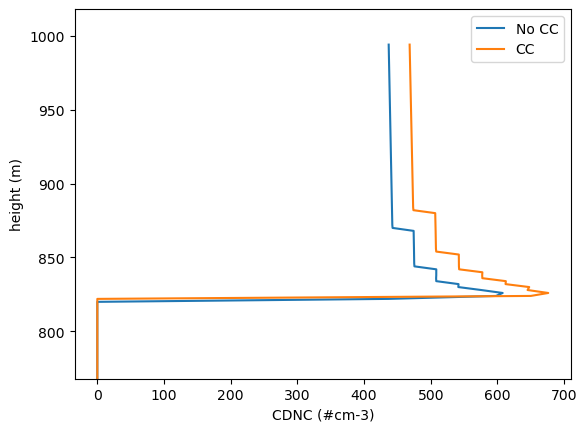

In [24]:
i = 2
CDNCNOCC = Name_ls[i]['fa_act'].isel( num_activation_criteria = 2,num_aerosols_plus_3 = 0)
CDNCCC = Name_ls[i+12]['fa_act'].isel( num_activation_criteria = 2,num_aerosols_plus_3 = 0)
plt.plot(CDNCNOCC, Name_ls[i]['height'], label = 'No CC')
plt.plot(CDNCCC, Name_ls[i+12]['height'], label = 'CC')
CBheight = np.min(Name_ls[i]['height'].where(Name_ls[i]['susa']>=0))
plt.ylim([CBheight-50, CBheight+200])
plt.ylabel('height (m)')
plt.xlabel('CDNC (#cm-3)')
plt.legend()

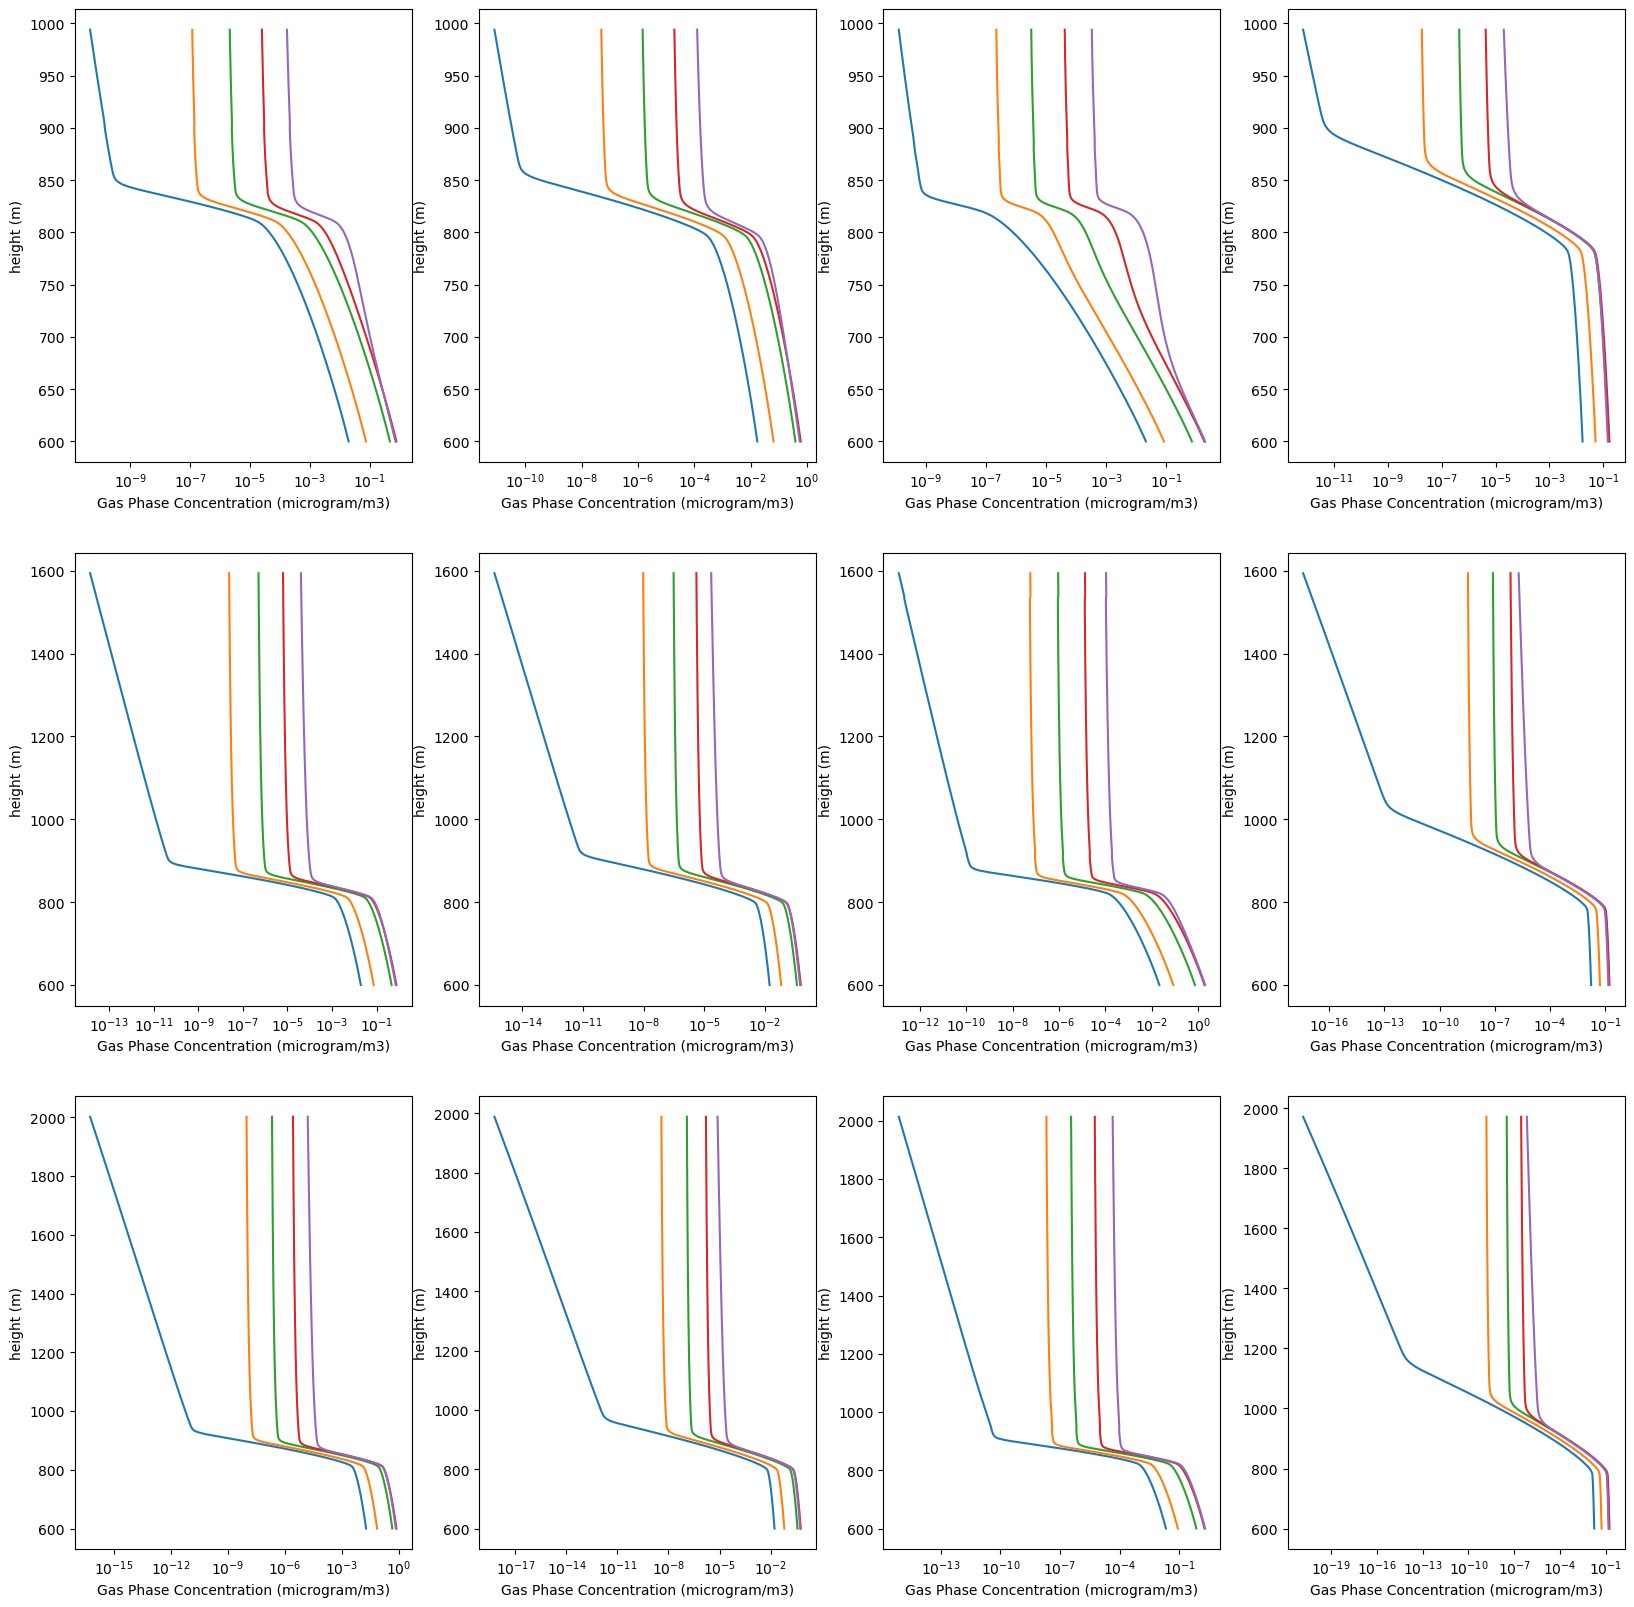

In [16]:
fig = plt.figure(figsize = (20,20))
for i in range (0,12):
    plt.subplot(3,4,i+1)
    plt.plot(Name_ls[i+12]['vbs_gas_concentration'].isel(norg_plus1 = slice(0,5))*1E9, Name_ls[i+12]['height'])
    plt.xscale('log')
    plt.xlabel('Gas Phase Concentration (microgram/m3)')
    plt.ylabel('height (m)')
    plt.savefig('plots/ECCCTest1.png')

In [17]:

InitialNor1Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft1/snap_time-0.nc')
InitialNor2Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft1/snap_time-0.nc')
InitialNor3Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft1/snap_time-0.nc')
InitialNor4Up1CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft1/snap_time-0.nc')
InitialNor1Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft2/snap_time-0.nc')
InitialNor2Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft2/snap_time-0.nc')
InitialNor3Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft2/snap_time-0.nc')
InitialNor4Up2CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft2/snap_time-0.nc')
InitialNor1Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor1/CC/Updraft3/snap_time-0.nc')
InitialNor2Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor2/CC/Updraft3/snap_time-0.nc')
InitialNor3Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor3/CC/Updraft3/snap_time-0.nc')
InitialNor4Up3CC_ds= xr.open_dataset('/share/pech2273/PARSEC/NorESM/Nor4/CC/Updraft3/snap_time-0.nc')

In [18]:
InitialCCName_ls = [InitialNor1Up1CC_ds,InitialNor2Up1CC_ds,InitialNor3Up1CC_ds,InitialNor4Up1CC_ds,InitialNor1Up2CC_ds,InitialNor2Up2CC_ds,InitialNor3Up2CC_ds,InitialNor4Up2CC_ds,InitialNor1Up3CC_ds,InitialNor2Up3CC_ds,InitialNor3Up3CC_ds,InitialNor4Up3CC_ds,]
VBSGasConcDelta = []
for i in range(0,12):
    VBSGasConcDelta.append(sum(Name_ls[i+12]['vbs_gas_concentration'].isel(time_entries = int((Name_ls[i+12]['relhum']>=100).argmax())-1, norg_plus1 = slice(0,5)).values)-\
    sum(InitialCCName_ls[i]['vbs_gas_concentration'].isel(norg_plus1 = slice(0,5)).values))
Data = {'$\Delta$ VBS Gas Concentrations $(\mu g m^{-3})$' : VBSGasConcDelta }
VBSGasConcDelta = pd.DataFrame(Data)
VBSGasConcDelta.index = ['Cluster 1 Updraft 1','Cluster 2 Updraft 1','Cluster 3 Updraft 1','Cluster 4 Updraft 1', 'Cluster 1 Updraft 2','Cluster 2 Updraft 2','Cluster 3 Updraft 2','Cluster 4 Updraft 2','Cluster 1 Updraft 3','Cluster 2 Updraft 3','Cluster 3 Updraft 3','Cluster 4 Updraft 3']

VBSGasConcDelta

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3640710/740636620.py:6: SyntaxWarning: invalid escape sequence '\D'
  Data = {'$\Delta$ VBS Gas Concentrations $(\mu g m^{-3})$' : VBSGasConcDelta }


,$\Delta$ VBS Gas Concentrations $(\mu g m^{-3})$
Cluster 1 Updraft 1,-2.053122e-09
Cluster 2 Updraft 1,-1.564157e-09
Cluster 3 Updraft 1,-4.594004e-09
Cluster 4 Updraft 1,-3.581246e-10
Cluster 1 Updraft 2,-1.891722e-09
Cluster 2 Updraft 2,-1.227420e-09
Cluster 3 Updraft 2,-4.545703e-09
Cluster 4 Updraft 2,-1.891993e-10
Cluster 1 Updraft 3,-1.624820e-09
Cluster 2 Updraft 3,-9.460649e-10


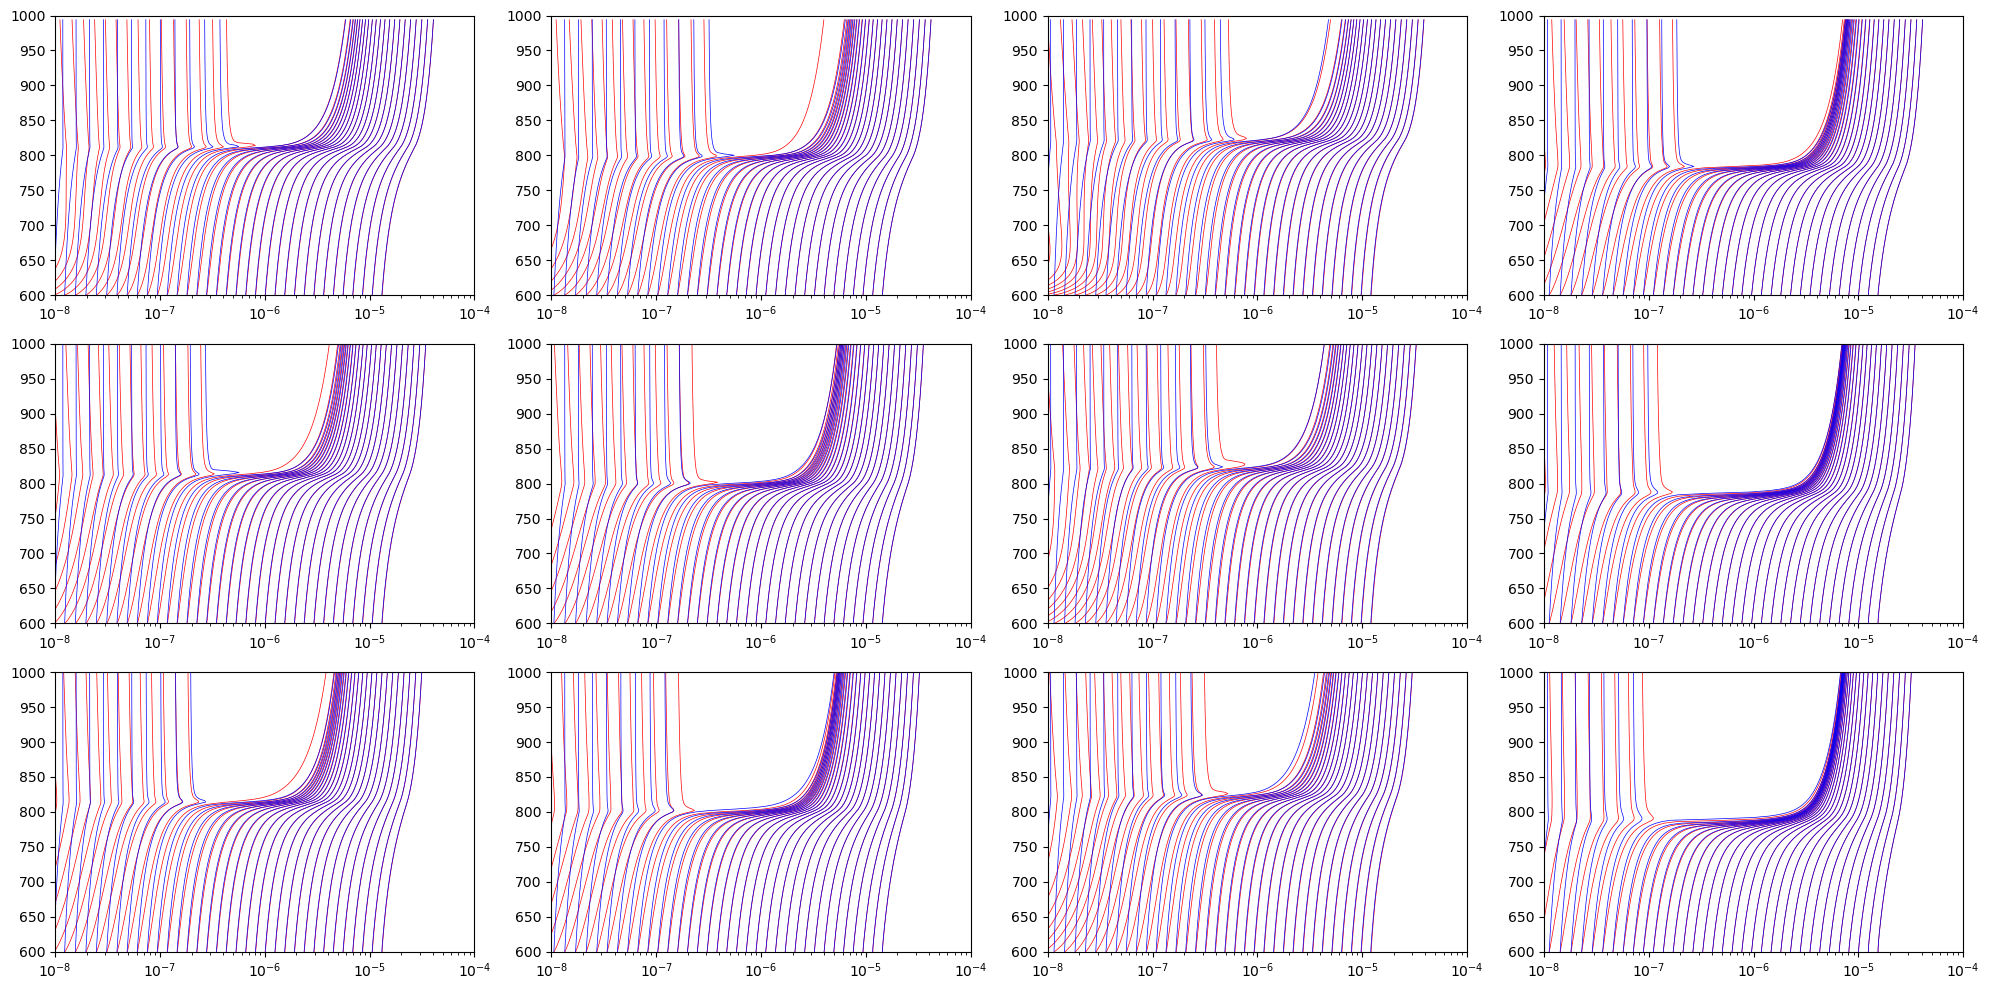

In [19]:
#Sum the bins at time = 0 and then the sum of bins at time right before RH = 100
# at RH = 90 or from initial parameters
fig = plt.figure(figsize = (20,10))
for i in range (0,12):
    plt.subplot(3,4,i+1)
    plt.plot(Name_ls[i+12]['rd'][:,0:None:10,0], Name_ls[i+12]['height'], 'r-', linewidth = .5, label = 'With Co-Condensation')
    plt.xscale('log')
    fig = plt.plot(Name_ls[i]['rd'][:,0:None:10,0], Name_ls[i]['height'],'b-', linewidth = .5, label = 'Without Co-condensation')
    plt.ylim([600,1000])
    plt.xlim([1E-8, 1E-4])
    #plt.legend()

plt.tight_layout()

In [34]:
Activation_radius_delta = []
Activated_radius = []
Activated_radiusCC = []
data = np.random.rand(399) 
Activation_radius_delta = [] 
for n in range(0,12):
    DifferenceIndexNoCC = xr.DataArray(data, dims=["x"], coords={"x": np.arange(399)})
    DifferenceIndexCC = xr.DataArray(data, dims=["x"], coords={"x": np.arange(399)})
    for i in range(0,len(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0))-1):
        DifferenceIndexCC[i] = np.log10(Name_ls[n+12]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i+1))- np.log10(Name_ls[n+12]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i))
    max_indCC = int(DifferenceIndexCC.argmax())
    for i in range(0,len(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0))-1):
        DifferenceIndexNoCC[i] = np.log10(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i+1))- np.log10(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i))
    max_indNoCC = int(DifferenceIndexNoCC.argmax())
    Activated_radius.append(np.float64(Name_ls[n]['ra'].isel(time_entries = -1,  num_aerosol_bins = max_indNoCC+1))*2E9)
    Activated_radiusCC.append(np.float64(Name_ls[n+12]['ra'].isel(time_entries = -1,  num_aerosol_bins = max_indCC+1))*2E9)
    Activation_radius_delta.append((np.float64(Name_ls[n+12]['ra'].isel(time_entries = -1,  num_aerosol_bins = max_indNoCC+1))-np.float64(Name_ls[n+12]['ra'].isel(time_entries = -1,  num_aerosol_bins = max_indCC+1)))*2E9)
Data = {'Activation Diameter, No CC ($nm$)':Activated_radius,'Activation Diameter,  CC ($nm$)':Activated_radiusCC, ' $\Delta$D ($nm$)':Activation_radius_delta}
Activation_radius_delta = pd.DataFrame(Data)


<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3640710/4097608181.py:18: SyntaxWarning: invalid escape sequence '\D'
  Data = {'Activation Diameter, No CC ($nm$)':Activated_radius,'Activation Diameter,  CC ($nm$)':Activated_radiusCC, ' $\Delta$D ($nm$)':Activation_radius_delta}


In [35]:
Activated_radius

[np.float64(171.27179794508717),
 np.float64(129.7681272383768),
 np.float64(226.04956544882387),
 np.float64(82.88680612635326),
 np.float64(127.02740777196964),
 np.float64(92.22282316159196),
 np.float64(174.96712605504354),
 np.float64(60.17642489833283),
 np.float64(107.08598197131427),
 np.float64(79.42261867825579),
 np.float64(147.49987294031467),
 np.float64(50.72961548053402)]

In [36]:
Activated_radiusCC

[np.float64(167.65451563806593),
 np.float64(121.71839935273819),
 np.float64(221.2753696768497),
 np.float64(74.49590453102621),
 np.float64(119.14769117018751),
 np.float64(82.88680612635326),
 np.float64(171.27179794508717),
 np.float64(54.08456923060725),
 np.float64(98.3218898207321),
 np.float64(68.39903769437733),
 np.float64(138.3502160437893),
 np.float64(46.57782066434512)]

In [37]:
Activation_radius_delta.index = ['Cluster 1 Updraft 1','Cluster 2 Updraft 1','Cluster 3 Updraft 1','Cluster 4 Updraft 1', 'Cluster 1 Updraft 2','Cluster 2 Updraft 2','Cluster 3 Updraft 2','Cluster 4 Updraft 2','Cluster 1 Updraft 3','Cluster 2 Updraft 3','Cluster 3 Updraft 3','Cluster 4 Updraft 3']
Activation_radius_delta

,"Activation Diameter, No CC ($nm$)","Activation Diameter, CC ($nm$)",$\Delta$D ($nm$)
Cluster 1 Updraft 1,171.271798,167.654516,3.617282
Cluster 2 Updraft 1,129.768127,121.718399,8.049728
Cluster 3 Updraft 1,226.049565,221.275370,4.774196
Cluster 4 Updraft 1,82.886806,74.495905,8.390902
Cluster 1 Updraft 2,127.027408,119.147691,7.879717
Cluster 2 Updraft 2,92.222823,82.886806,9.336017
Cluster 3 Updraft 2,174.967126,171.271798,3.695328
Cluster 4 Updraft 2,60.176425,54.084569,6.091856
Cluster 1 Updraft 3,107.085982,98.321890,8.764092
Cluster 2 Updraft 3,79.422619,68.399038,11.023581


In [26]:
n = 2
DifferenceIndexNoCC = xr.DataArray(data, dims=["x"], coords={"x": np.arange(399)})
DifferenceIndexCC = xr.DataArray(data, dims=["x"], coords={"x": np.arange(399)})
for i in range(0,len(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0))-1):
    DifferenceIndexCC[i] = Name_ls[n+12]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i+1)- Name_ls[n+12]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i)
Test = int(DifferenceIndexCC.argmax())
for i in range(0,len(Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0))-1):
    DifferenceIndexNoCC[i] = Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i+1)- Name_ls[n]['rd'].isel(time_entries = -1, num_aerosols = 0, num_aerosol_bins = i)
TestNoCC = int(DifferenceIndexNoCC.argmax())


(1e-08, 0.0001)

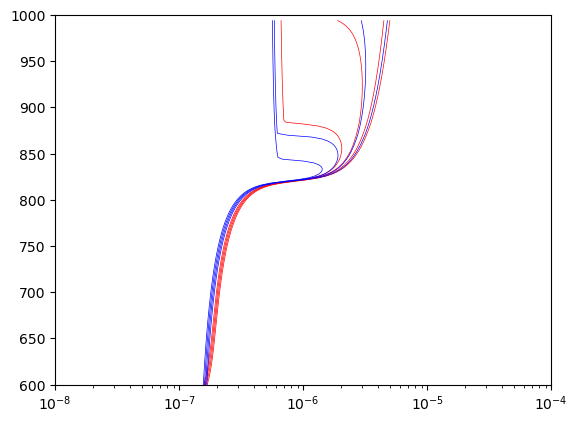

In [33]:
plt.plot(Name_ls[2+12]['rd'][:,Test-1:Test+3,0], Name_ls[2+12]['height'], 'r-', linewidth = .5, label = 'With Co-Condensation')
plt.xscale('log')
fig = plt.plot(Name_ls[2]['rd'][:,TestNoCC-1:TestNoCC+3,0], Name_ls[2]['height'],'b-', linewidth = .5, label = 'Without Co-condensation')
plt.ylim([600,1000])
plt.xlim([1E-8, 1E-4])